In [46]:
import pandas as pd
df = pd.read_csv("BLM_classification_analysis_cleaned.csv")

In [47]:
# Check groupings
df = pd.read_csv('BLM_classification_analysis_cleaned.csv')

group_counts = df["group"].value_counts()
print(group_counts)


group
Black people                      2178
Black community                   1482
Black women                        919
Black men                          577
Black Americans                    266
                                  ... 
Black civilians                      1
Black publishing professionals       1
Black cowboys                        1
Black women and lives                1
Black and Latino Democrats           1
Name: count, Length: 431, dtype: int64


In [52]:
group_map = {
    "Black men": [
        "African American male students", "African American men", "Black Transman", "Black and Brown boys",
        "Black boy", "Black boys", "Black boys and men", "Black male", "Black males", "Black man", "Black men",
        "Black men & women", "Black men and boys", "Black men and women", "Black men, Black women",
        "Black men, women, youth", "Black trans man", "Black transgender men", "young Black men and women"
    ],
    "Black women": [
        "African American women", "Black & minoritized women", "Black Iranian women", "Black and Brown girls",
        "Black and Brown trans women", "Black and Brown women", "Black and Native women",
        "Black and South Asian American women", "Black and South Asian women", "Black and brown girls",
        "Black and brown women", "Black girl", "Black girls", "Black girls and women", "Black immigrant women",
        "Black men & women", "Black men and women", "Black men, Black women", "Black men, women, youth",
        "Black trans woman", "Black trans women", "Black transgender women", "Black woman", "Black women",
        "Black women & men", "Black women and Black men", "Black women and Black non-binary people",
        "Black women and LGBTQ individuals", "Black women and girls", "Black women and men", "Black womxn",
        "young Black men and women"
    ],
    "Black youth": [
        "African American male students", "African American students", "African American youth",
        "Black and Brown boys", "Black and Brown girls", "Black and Brown students", "Black and Latino children",
        "Black and Latino students", "Black and brown girls", "Black and brown students", "Black babies",
        "Black boy", "Black boys", "Black boys and men", "Black child", "Black children", "Black girl",
        "Black girls", "Black girls and women", "Black infants", "Black kids", "Black men and boys",
        "Black men, women, youth", "Black moms and babies", "Black mother and children", "Black newborn babies",
        "Black student athletes", "Black student-athletes", "Black students", "Black students and alumni",
        "Black students and community members", "Black students, faculty, & staff", "Black teen", "Black teenager",
        "Black teenagers", "Black teens", "Black women and girls", "Black women, Black men, Black children",
        "Black youngsters", "Black youth", "Black youths", "young black children"
    ]
}

# Reverse mapping for quick lookup
reverse_map = {}
for category, names in group_map.items():
    for name in names:
        reverse_map[name.lower()] = category

# Function to map group
def map_group(g):
    g_lower = str(g).lower()
    return reverse_map.get(g_lower, "Black people")

df['cleaned_group'] = df['group'].apply(map_group)

# Save cleaned dataset
df.to_csv("grouped_dataset.csv", index=False)

In [51]:
# Get counts of unique dimension values
dim_counts = df['dimension'].value_counts(dropna=False)

dim_summary = dim_counts.reset_index()
dim_summary.columns = ['dimension', 'count']

print(dim_counts)

dimension
victimhood                 3176
status                     2365
capability/incapability     759
assertiveness               592
warmth/hostility            491
neutral                      40
sexualization                13
hostility/warmth              5
hostility                     3
isolation/alienation          1
Victimhood                    1
zero                          1
success                       1
Name: count, dtype: int64


In [55]:
# Cleaned_dimension
df = pd.read_csv("grouped_dataset.csv")

# Merge hostility variants
df['cleaned_dimension'] = df['dimension'].replace({
    'Hostility/warmth': 'Warmth/hostility',
    'Hostility': 'Warmth/hostility'
})

# Remove unwanted categories
remove_categories = ['Neutral', 'Isolation/alienation', 'Zero', 'Success']
df = df[~df['cleaned_dimension'].str.lower().isin([c.lower() for c in remove_categories])]

# Keep only valid dimensions
valid_dimensions = [
    'Victimhood',
    'Status',
    'Capability/incapability',
    'Assertiveness',
    'Warmth/hostility'
] # Sexulization dimenion removed as not much posts were shown
df = df[df['cleaned_dimension'].str.lower().isin([v.lower() for v in valid_dimensions])]

# Ensure consistent casing
df['cleaned_dimension'] = df['cleaned_dimension'].str.title().replace({
    'Warmth/Hostility': 'Warmth/hostility',
    'Capability/Incapability': 'Capability/incapability'
})

df.to_csv("BLM_FINAL_analysis_data.csv", index=False)



In [56]:
# Ensure time column is datetime
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Define BLM event date
BLM_eventday = pd.Timestamp("2020-05-25")

# Create pre/post label
df['period_BLM'] = df['published_at'].apply(lambda x: 'pre' if x < BLM_eventday else 'post')

df.head()

,post,clarification,dimension,stereotype_term,valence,group,stereotype_origin,rationale,confidence,published_at,cleaned_group,cleaned_dimension,period_BLM
0,For those of us who have never seen them in ac...,The post promotes a documentary about the Blac...,status,Black Panthers,1,Black community,Black community,This post emphasizes the historical significan...,very certain,2020-06-11,Black people,Status,post
1,The racial wealth gap is no accident. To close...,The post discusses the need for policies to ad...,victimhood,racial wealth gap,0,Black Americans,Black people,This post addresses systemic issues affecting ...,fairly certain,2020-07-30,Black people,Victimhood,post
2,"If you’re not racist, then why would you have ...",The post challenges racism and highlights the ...,victimhood,fear of police officers,-1,Black people,Black people,It emphasizes the ongoing fear and discriminat...,very certain,2020-05-29,Black people,Victimhood,post
3,An absolutely stunning and powerful cover of V...,The post highlights Viola Davis and the achiev...,status,first Black photographer,1,Black people,Black community,This post celebrates a significant achievement...,very certain,2020-07-15,Black people,Status,post
4,Repost: @blairimani : ~~~~ “Let’s deconstruct ...,The post calls for deconstructing anti-Black l...,victimhood,anti-blackness,-1,Black people,Black community,It highlights how language can perpetuate oppr...,fairly certain,2020-06-08,Black people,Victimhood,post


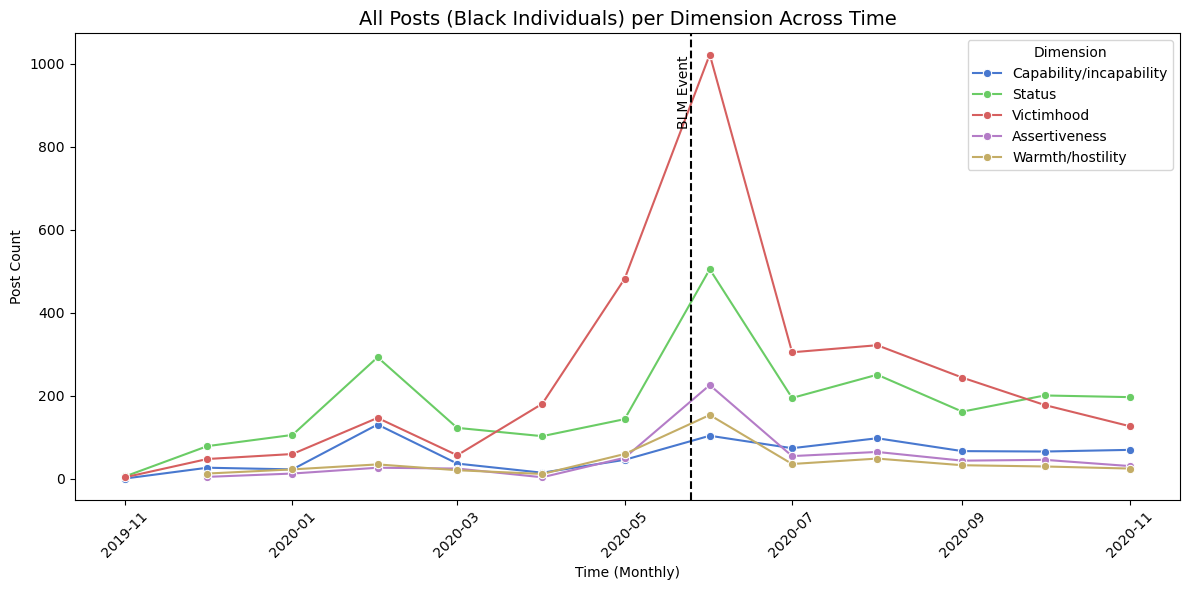

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BLM_FINAL_analysis_data.csv")

# Ensure date column is datetime
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Remove rows without valid cleaned_dimension
df = df.dropna(subset=['cleaned_dimension'])

# Group by month and dimension
df['month'] = df['published_at'].dt.to_period('M').dt.to_timestamp()
dim_counts = (
    df.groupby(['month', 'cleaned_dimension'])
    .size()
    .reset_index(name='count')
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=dim_counts,
    x='month',
    y='count',
    hue='cleaned_dimension',
    marker="o"
)

# Event line for BLM (May 25, 2020)
blm_event_date = pd.Timestamp("2020-05-25")
plt.axvline(blm_event_date, color='black', linestyle='--')
plt.text(blm_event_date, plt.ylim()[1]*0.95, "BLM Event", rotation=90, va='top', ha='right')

# Labels & Title
plt.title("All Posts (Black Individuals) per Dimension Across Time", fontsize=14)
plt.xlabel("Time (Monthly)")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.legend(title="Dimension")
plt.tight_layout()
plt.show()

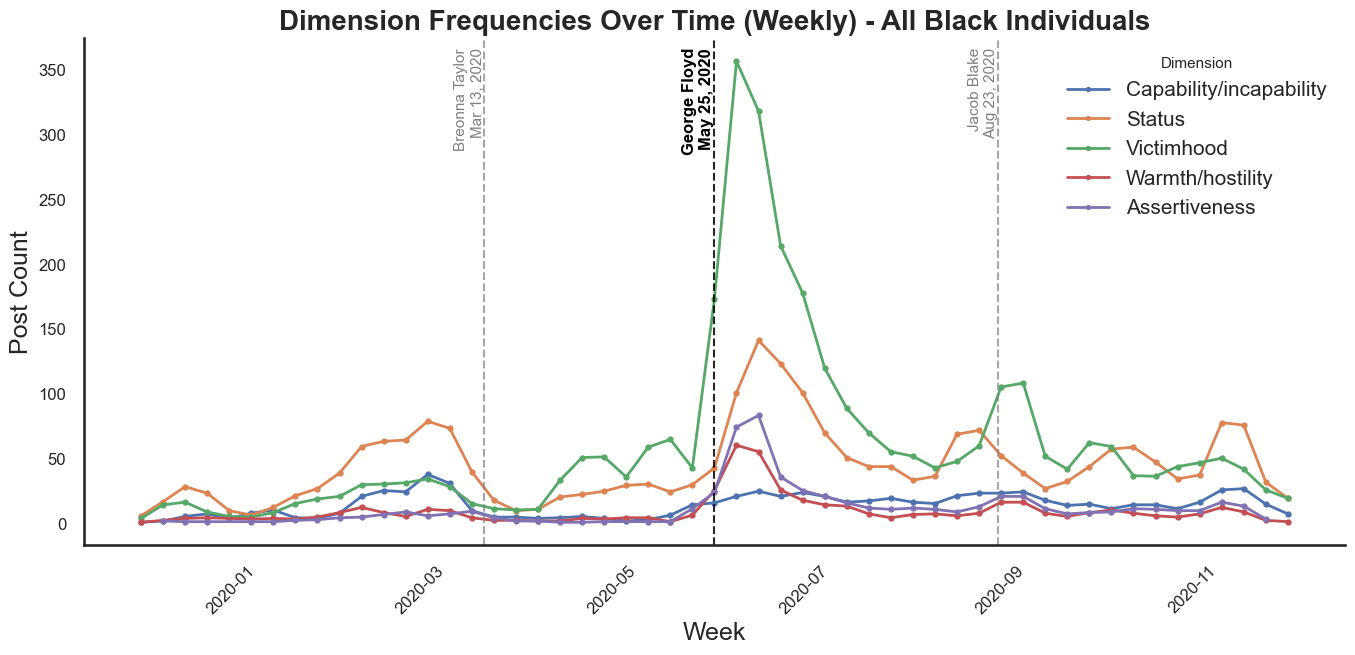

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data
df = pd.read_csv("BLM_FINAL_analysis_data.csv")

# Ensure datetime format
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Keep only rows with a valid cleaned_dimension
df = df.dropna(subset=['cleaned_dimension'])

# ===== Weekly aggregation =====
df['week'] = df['published_at'].dt.to_period('W').dt.start_time
weekly_counts = (
    df.groupby(['week', 'cleaned_dimension'])
    .size()
    .reset_index(name='count')
)

# Event dates
events = {
    "Breonna Taylor\nMar 13, 2020": "2020-03-13",
    "George Floyd\nMay 25, 2020": "2020-05-25",  # Main event
    "Jacob Blake\nAug 23, 2020": "2020-08-23"
}

# Style adjustments
sns.set_style("white")  # No background grid
sns.set_context("talk", font_scale=1.2)
palette = sns.color_palette("Set2", n_colors=weekly_counts['cleaned_dimension'].nunique())

# Create plot
fig, ax = plt.subplots(figsize=(14, 7))

for dim in weekly_counts['cleaned_dimension'].unique():
    temp = weekly_counts[weekly_counts['cleaned_dimension'] == dim].copy()
    temp = temp.sort_values('week')
    temp['count_smooth'] = temp['count'].rolling(window=2, min_periods=1).mean()

    ax.plot(temp['week'], temp['count_smooth'],
            marker='o', linewidth=2, markersize=3.5,  # Smaller dots
            label=dim)

# Titles and labels
ax.set_title("Dimension Frequencies Over Time (Weekly) - All Black Individuals", fontsize=20, weight='bold')
ax.set_xlabel("Week", fontsize=18)
ax.set_ylabel("Post Count", fontsize=18)

# Smaller tick labels
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Event lines
ylim = plt.ylim()
for label, date in events.items():
    x = pd.Timestamp(date)
    if "George Floyd" in label:
        ax.axvline(x, color='black', linestyle='--', linewidth=1.5, alpha=0.85)
        ax.text(x, ylim[1]*0.98, label, rotation=90, va='top', ha='right',
                fontsize=12, color='black', weight='bold')
    else:
        ax.axvline(x, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
        ax.text(x, ylim[1]*0.98, label, rotation=90, va='top', ha='right',
                fontsize=11, color='gray')

# Legend inside plot
ax.legend(
    title='Dimension',
    loc='upper right',
    frameon=False,
    fontsize=15,          # Legend text size
    title_fontsize=11,    # Legend title size
    markerscale=0.8       # Smaller markers in legend
)

# Remove spines for clean look
sns.despine()

# Remove grid lines
ax.grid(False)

plt.tight_layout()
plt.show()


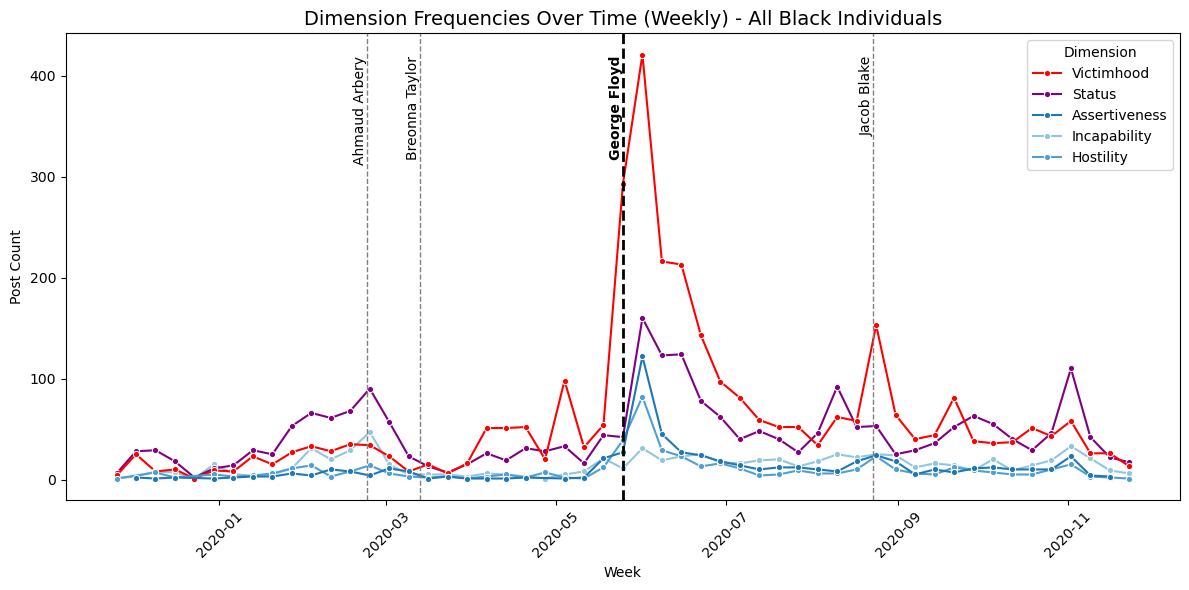

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("BLM_FINAL_analysis_data.csv")

# Ensure datetime format
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Keep only rows with a valid cleaned_dimension
df = df.dropna(subset=['cleaned_dimension'])

# ===== 1. WEEKLY PLOT =====
df['week'] = df['published_at'].dt.to_period('W').dt.start_time
weekly_counts = (
    df.groupby(['week', 'cleaned_dimension'])
    .size()
    .reset_index(name='count')
)

# ---- Custom color mapping ----
color_map = {
    'Victimhood': 'red',
    'Status': 'purple',
    'Assertiveness': '#1f77b4',  # blue tone
    'Capability/incapability': '#92c5de',  # lighter blue
    'Warmth/hostility': '#4f9fd1'  # pale blue
}

# ---- Plot ----
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=weekly_counts,
    x='week',
    y='count',
    hue='cleaned_dimension',
    marker="o",
    markersize=4.5,
    palette=color_map
)

# ---- Event lines ----
ahmaud_arbery = pd.Timestamp("2020-02-23")
breonna_taylor = pd.Timestamp("2020-03-13")
george_floyd = pd.Timestamp("2020-05-25")
jacob_blake = pd.Timestamp("2020-08-23")



plt.axvline(ahmaud_arbery, color='grey', linestyle='--', linewidth=1)
plt.text(ahmaud_arbery, plt.ylim()[1]*0.95, "Ahmaud Arbery", rotation=90, va='top', ha='right')

# Breonna Taylor
plt.axvline(breonna_taylor, color='grey', linestyle='--', linewidth=1)
plt.text(breonna_taylor, plt.ylim()[1]*0.95, "Breonna Taylor", rotation=90, va='top', ha='right')

# George Floyd 
plt.axvline(george_floyd, color='black', linestyle='--', linewidth=2)
plt.text(george_floyd, plt.ylim()[1]*0.95, "George Floyd", rotation=90, va='top', ha='right', fontweight='bold')

# Jacob Blake
plt.axvline(jacob_blake, color='grey', linestyle='--', linewidth=1)
plt.text(jacob_blake, plt.ylim()[1]*0.95, "Jacob Blake", rotation=90, va='top', ha='right')

# ---- Custom legend labels ----
new_labels = {
    'Victimhood': 'Victimhood',
    'Status': 'Status',
    'Assertiveness': 'Assertiveness',
    'Capability/incapability': 'Incapability',
    'Warmth/hostility': 'Hostility'
}

handles, labels = plt.gca().get_legend_handles_labels()
label_map = {label: new_labels.get(label, label) for label in labels}
desired_order = ["Victimhood", "Status", "Assertiveness", "Capability/incapability", "Warmth/hostility"]
ordered_handles = [handles[labels.index(l)] for l in desired_order]
ordered_labels = [label_map[l] for l in desired_order]

plt.legend(ordered_handles, ordered_labels, title="Dimension")

# ---- Titles & labels ----
plt.title("Dimension Frequencies Over Time (Weekly) - All Black Individuals", fontsize=14)
plt.xlabel("Week")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


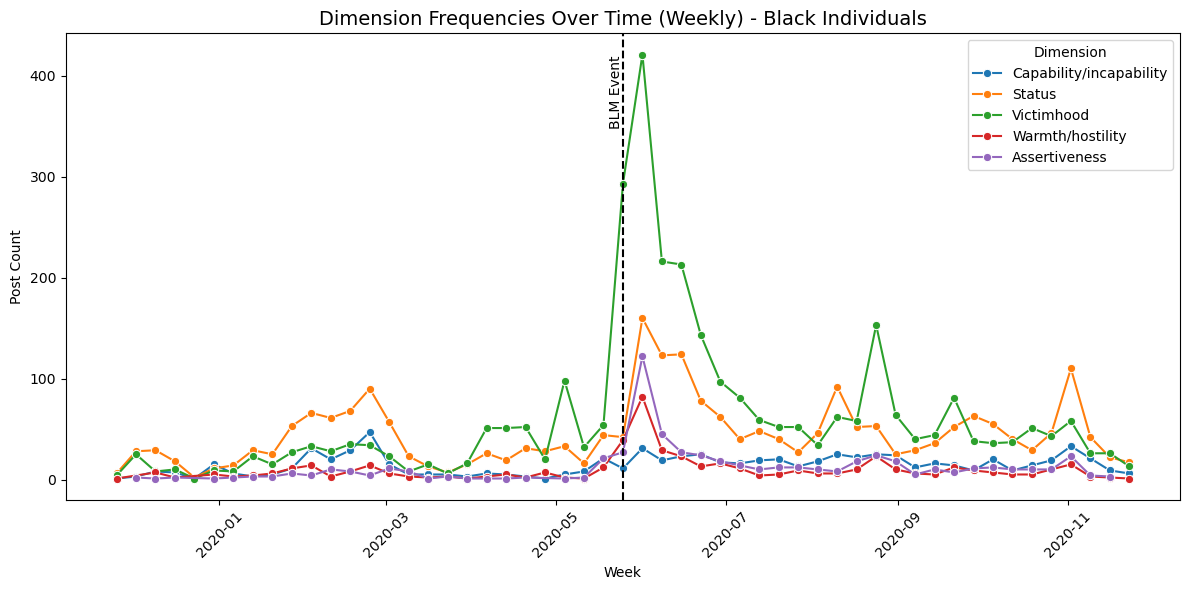

/var/folders/tx/xm4kstbj1pzb3z_rzr9k8h540000gn/T/ipykernel_9478/2371430811.py:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values('published_at')


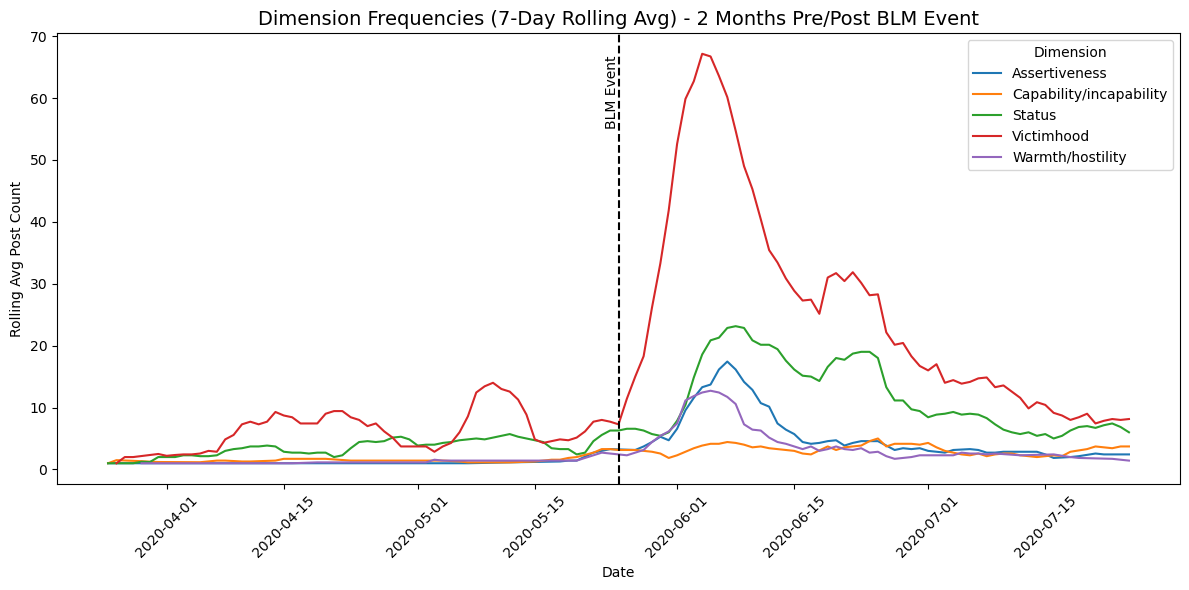

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DAILY PLOT (2 months pre/post BLM)

df = pd.read_csv("BLM_FINAL_analysis_data.csv")
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Keep only rows with a valid cleaned_dimension
df = df.dropna(subset=['cleaned_dimension'])

# Define BLM event date and time frame
blm_event_date = pd.Timestamp("2020-05-25")
start_date = blm_event_date - pd.DateOffset(months=2)
end_date = blm_event_date + pd.DateOffset(months=2)

# Filter for 2 months pre/post BLM
df_daily = df[(df['published_at'] >= start_date) & (df['published_at'] <= end_date)]

# Group by date & dimension
daily_counts = (
    df_daily.groupby(['published_at', 'cleaned_dimension'])
    .size()
    .reset_index(name='count')
)

# Apply rolling average by dimension
daily_counts = (
    daily_counts
    .groupby('cleaned_dimension', group_keys=False)
    .apply(lambda x: x.sort_values('published_at')
                      .assign(rolling_count=x['count'].rolling(7, min_periods=1).mean()))
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=daily_counts,
    x='published_at',
    y='rolling_count',
    hue='cleaned_dimension'
)
plt.axvline(blm_event_date, color='black', linestyle='--')
plt.text(blm_event_date, plt.ylim()[1]*0.95, "BLM Event", rotation=90, va='top', ha='right')
plt.title("Dimension Frequencies (7-Day Rolling Avg) - 2 Months Pre/Post BLM Event", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Rolling Avg Post Count")
plt.xticks(rotation=45)
plt.legend(title="Dimension")
plt.tight_layout()
plt.show()


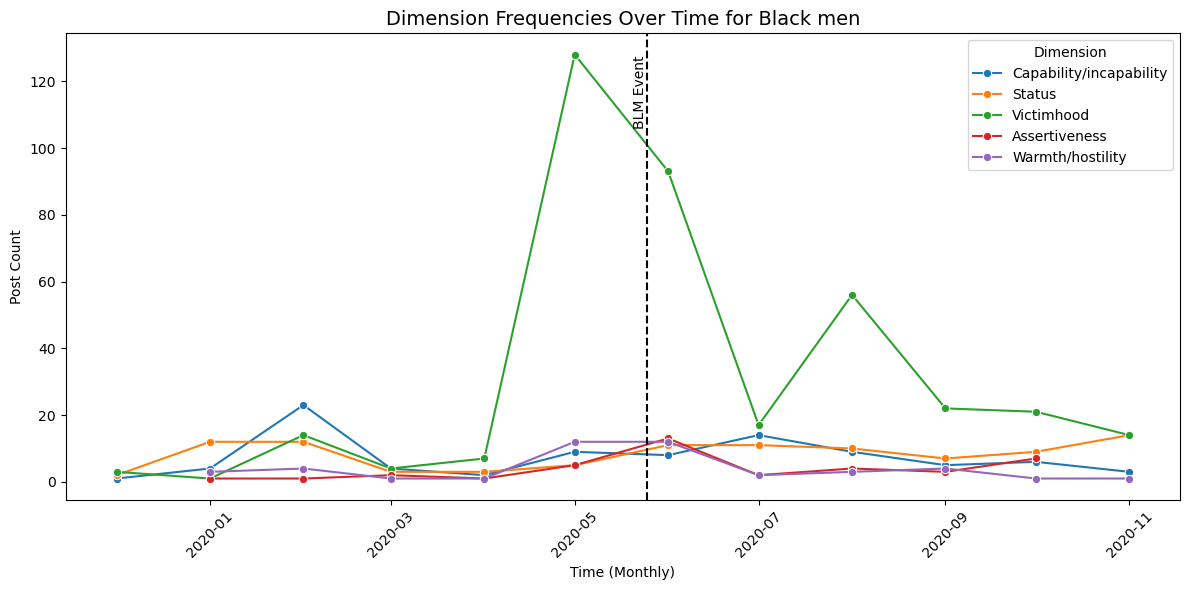

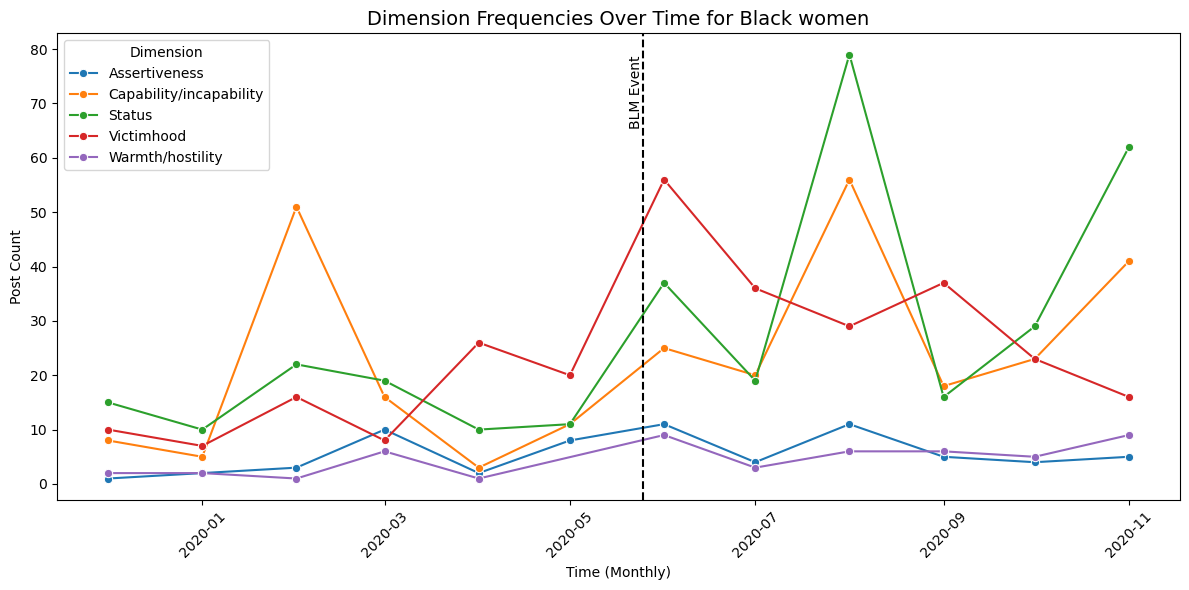

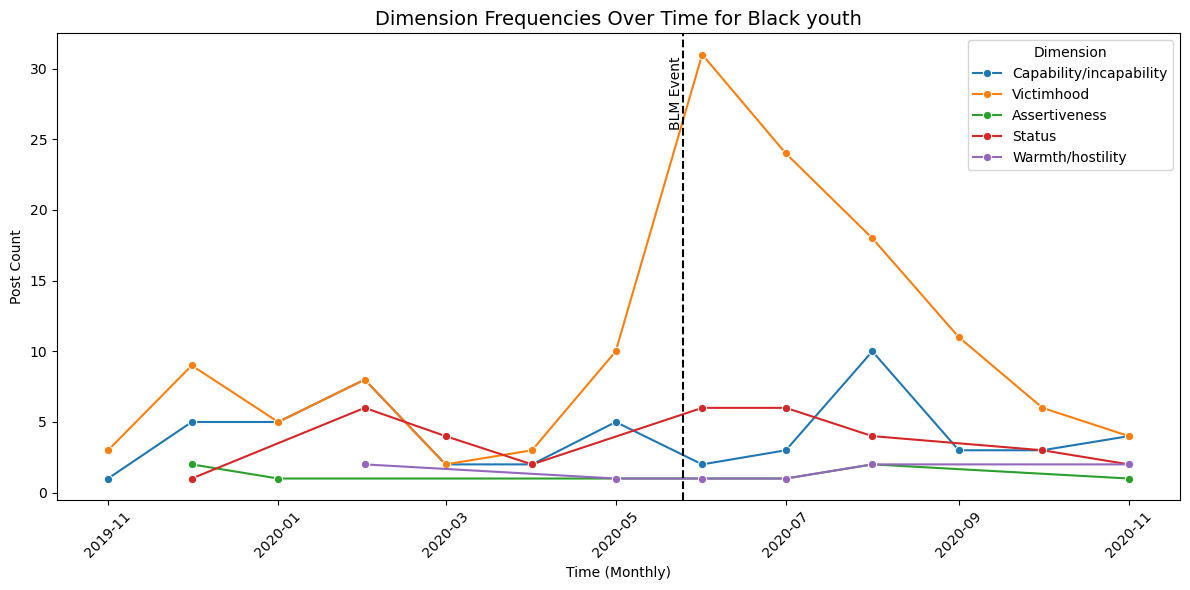

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dimension frequencies per each group 
df = pd.read_csv("BLM_FINAL_analysis_data.csv")
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Keep only the 3 target groups
target_groups = ["Black men", "Black women", "Black youth"]
df = df[df['cleaned_group'].isin(target_groups)]

# Remove rows without valid cleaned_dimension
df = df.dropna(subset=['cleaned_dimension'])

# Group by month, group, and dimension
df['month'] = df['published_at'].dt.to_period('M').dt.to_timestamp()
dim_counts = (
    df.groupby(['cleaned_group', 'month', 'cleaned_dimension'])
    .size()
    .reset_index(name='count')
)

# Plot for each group
blm_event_date = pd.Timestamp("2020-05-25")
for group in target_groups:
    group_data = dim_counts[dim_counts['cleaned_group'] == group]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=group_data,
        x='month',
        y='count',
        hue='cleaned_dimension',
        marker="o"
    )
    
    # Event line for BLM
    plt.axvline(blm_event_date, color='black', linestyle='--')
    plt.text(blm_event_date, plt.ylim()[1]*0.95, "BLM Event", rotation=90, va='top', ha='right')
    
    # Labels & Title
    plt.title(f"Dimension Frequencies Over Time for {group}", fontsize=14)
    plt.xlabel("Time (Monthly)")
    plt.ylabel("Post Count")
    plt.xticks(rotation=45)
    plt.legend(title="Dimension")
    plt.tight_layout()
    plt.show()


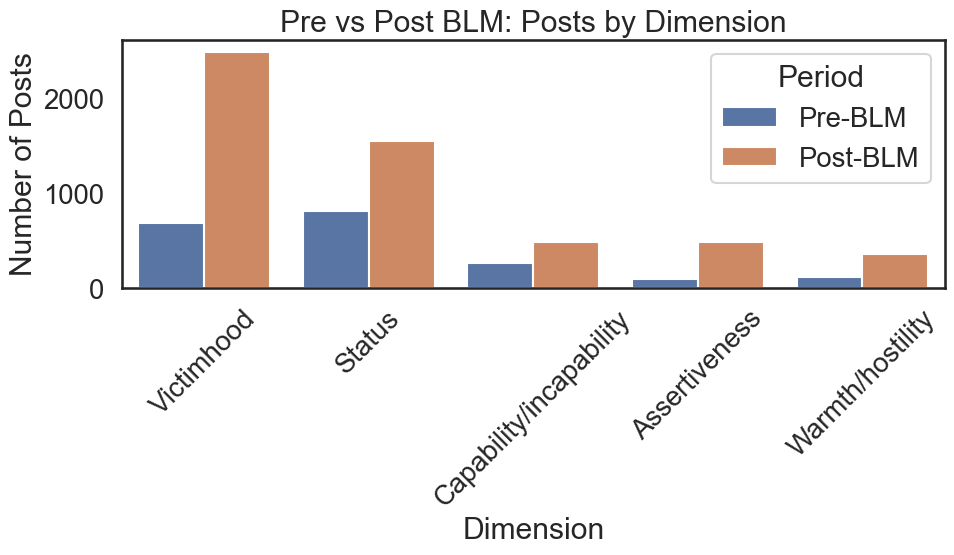

In [111]:
# Bar graph for dimension frequencies pre and post 
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
blm_event_date = pd.Timestamp("2020-05-25")

# Assign Pre/Post
df['Period'] = df['published_at'].apply(lambda x: 'Pre-BLM' if x < blm_event_date else 'Post-BLM')

# Count posts by dimension & period
dim_counts = (
    df.groupby(['cleaned_dimension', 'Period'])
    .size()
    .reset_index(name='Number of Posts')
)

# Sort dimensions by total post count (optional, for better plotting order)
dim_order = dim_counts.groupby('cleaned_dimension')['Number of Posts'].sum().sort_values(ascending=False).index

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=dim_counts,
    x='cleaned_dimension', y='Number of Posts',
    hue='Period',
    order=dim_order, 
    hue_order=['Pre-BLM', 'Post-BLM']
)
plt.xticks(rotation=45)
plt.xlabel("Dimension")
plt.ylabel("Number of Posts")
plt.title("Pre vs Post BLM: Posts by Dimension")
plt.tight_layout()
plt.show()

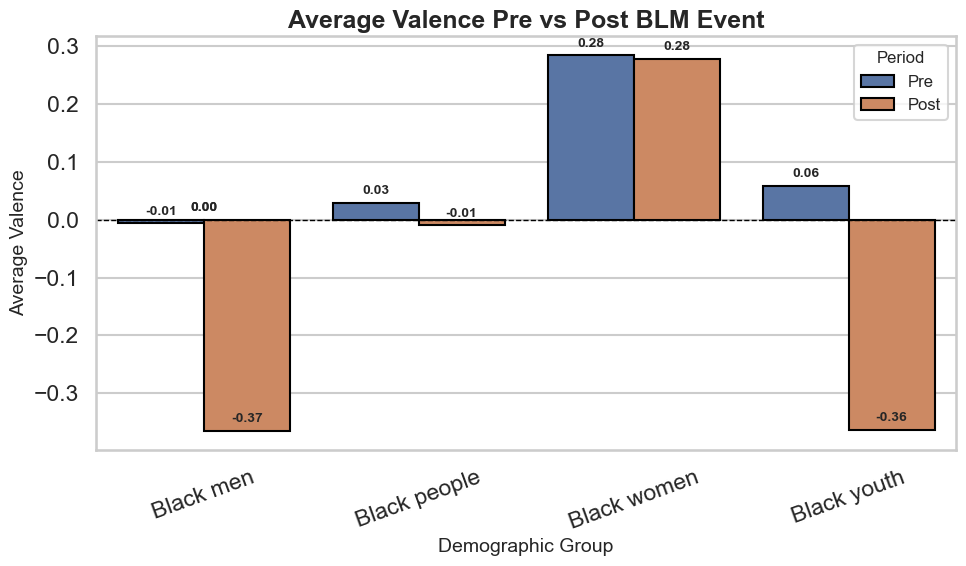

In [116]:
# Average valence
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")  # larger text for clarity

# Define a color palette
palette = {"Pre": "#4c72b0", "Post": "#dd8452"} 

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_valence,
    x='cleaned_group',
    y='valence',
    hue='period',
    hue_order=['Pre', 'Post'],
    palette=palette,
    edgecolor="black"
)

plt.axhline(0, color='black', linewidth=1, linestyle="--")

# Add labels on top of bars
for p in plt.gca().patches:
    val = p.get_height()
    plt.gca().annotate(
        f"{val:.2f}", 
        (p.get_x() + p.get_width() / 2., val),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        xytext=(0, 4), 
        textcoords='offset points'
    )

plt.title("Average Valence Pre vs Post BLM Event", fontsize=18)
plt.xlabel("Demographic Group", fontsize=14)
plt.ylabel("Average Valence", fontsize=14)
plt.legend(title="Period", fontsize=12, title_fontsize=12, frameon=True)

# Rotate x-axis labels for clarity
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()


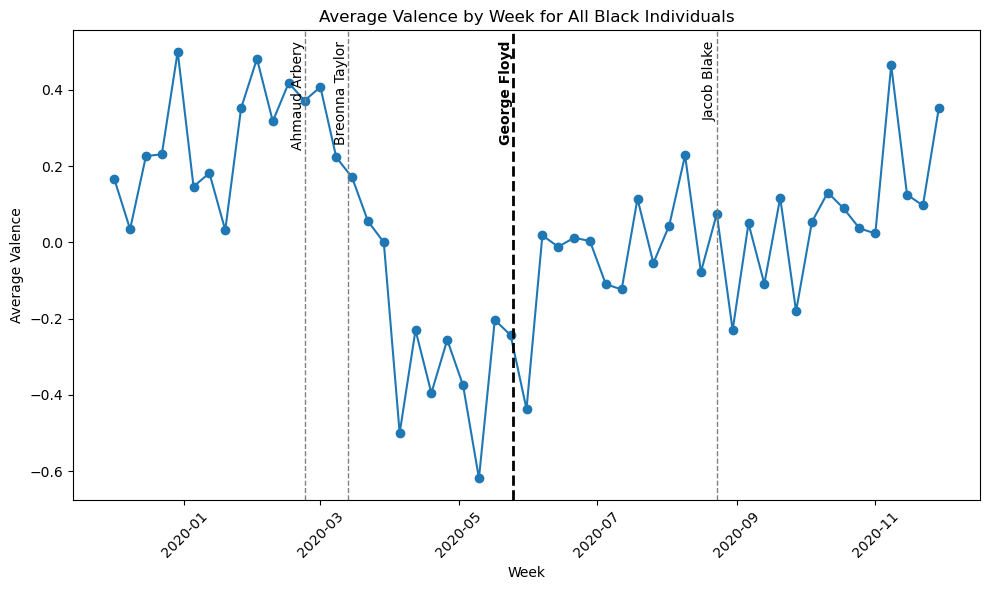

In [22]:
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Resample by week and calculate average valence
weekly_valence = (
    df.set_index('published_at')
      .resample('W')['valence']
      .mean()
      .reset_index()
)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekly_valence['published_at'], weekly_valence['valence'], marker='o')

# ---- Event lines ----
ahmaud_arbery = pd.Timestamp("2020-02-23")
breonna_taylor = pd.Timestamp("2020-03-13")
george_floyd = pd.Timestamp("2020-05-25")
jacob_blake = pd.Timestamp("2020-08-23")



plt.axvline(ahmaud_arbery, color='grey', linestyle='--', linewidth=1)
plt.text(ahmaud_arbery, plt.ylim()[1]*0.95, "Ahmaud Arbery", rotation=90, va='top', ha='right')

# Breonna Taylor
plt.axvline(breonna_taylor, color='grey', linestyle='--', linewidth=1)
plt.text(breonna_taylor, plt.ylim()[1]*0.95, "Breonna Taylor", rotation=90, va='top', ha='right')

# George Floyd (main event - darker & thicker line)
plt.axvline(george_floyd, color='black', linestyle='--', linewidth=2)
plt.text(george_floyd, plt.ylim()[1]*0.95, "George Floyd", rotation=90, va='top', ha='right', fontweight='bold')

# Jacob Blake
plt.axvline(jacob_blake, color='grey', linestyle='--', linewidth=1)
plt.text(jacob_blake, plt.ylim()[1]*0.95, "Jacob Blake", rotation=90, va='top', ha='right')
  

# Labels & title
ax.set_title("Average Valence by Week for All Black Individuals")
ax.set_xlabel("Week")
ax.set_ylabel("Average Valence")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



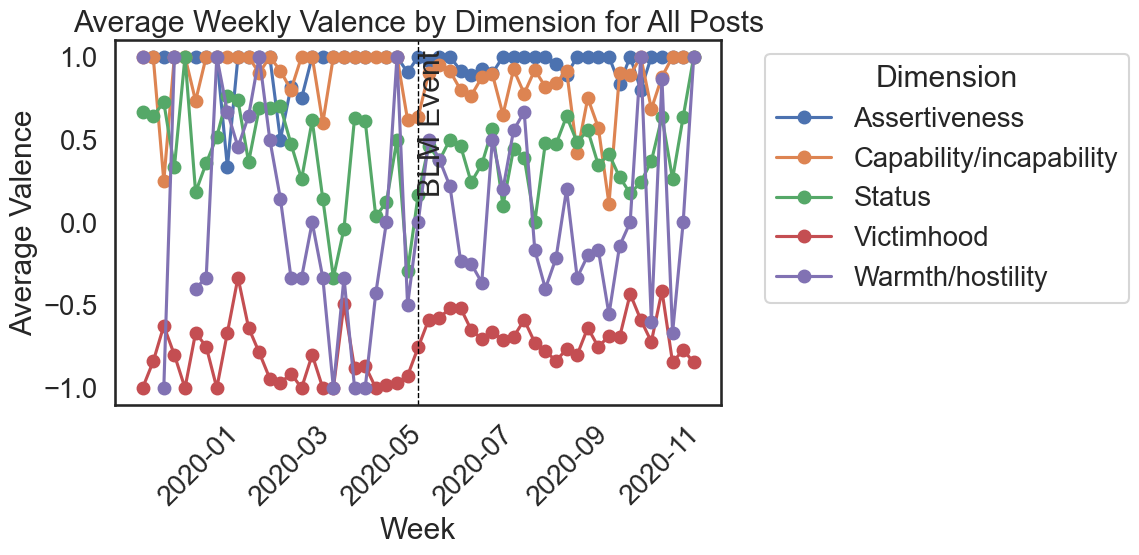

In [103]:
# Normalizing dimensions and valence per week 
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Standardize dimension names for cleaner plotting
df['dimension'] = df['cleaned_dimension'].str.strip().str.lower().str.capitalize()

# Create a weekly period column
df['week'] = df['published_at'].dt.to_period("W").dt.start_time

# Group by week & dimension, then get average valence
weekly_valence = (
    df.groupby(['week', 'dimension'])['valence']
      .mean()
      .reset_index()
)

# Pivot so dimensions are columns
weekly_pivot = weekly_valence.pivot(
    index='week', columns='dimension', values='valence'
)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

for dim in weekly_pivot.columns:
    ax.plot(weekly_pivot.index, weekly_pivot[dim], marker='o', label=dim)

# Add vertical line for BLM event
event_date = pd.Timestamp("2020-05-25")
ax.axvline(event_date, color="black", linestyle="--", linewidth=1)
ax.text(event_date, ax.get_ylim()[1]*0.95, "BLM Event", rotation=90, verticalalignment='top')

# Labels & title
ax.set_title("Average Weekly Valence by Dimension for All Posts")
ax.set_xlabel("Week")
ax.set_ylabel("Average Valence")
ax.legend(title="Dimension", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Chi-square test for all black individuals (see if stereotype dimension changes from pre and post)
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


df = pd.read_csv("BLM_FINAL_analysis_data.csv")
df['published_at'] = pd.to_datetime(df['published_at'])
blm_event_date = pd.Timestamp("2020-05-25")
df['period'] = np.where(df['published_at'] < blm_event_date, "Pre", "Post")

# Chi-square for all Black individuals
contingency = pd.crosstab(df['period'], df['cleaned_dimension'])
chi2, p, dof, expected = chi2_contingency(contingency)

# Cramér's V
n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape)-1)))

print(f"Chi²={chi2:.2f}, p={p:.4f}, Cramér's V={cramers_v:.3f}")


Chi²=172.67, p=0.0000, Cramér's V=0.153


In [ ]:
# T-test and cohen's d effect size for all groups for valence
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("BLM_FINAL_analysis_data.csv")

# Ensure datetime format
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Define BLM event date
blm_event_date = pd.Timestamp("2020-05-25")

# Pre/Post column
df['period'] = np.where(df['published_at'] < blm_event_date, "Pre", "Post")

# Function for Cohen's d
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx-1)*x.std(ddof=1)**2 + (ny-1)*y.std(ddof=1)**2) / (nx+ny-2))
    return (x.mean() - y.mean()) / pooled_std

# Groups to test
target_groups = {
    "Black individuals (all)": df,  # all rows
    "Black men": df[df['cleaned_group'] == "Black men"],
    "Black women": df[df['cleaned_group'] == "Black women"],
    "Black youth": df[df['cleaned_group'] == "Black youth"]
}

# Run t-tests
for label, subset in target_groups.items():
    pre = subset[subset['period'] == "Pre"]['valence'].dropna()
    post = subset[subset['period'] == "Post"]['valence'].dropna()
    
    if len(pre) > 1 and len(post) > 1:
        t_stat, p_val = ttest_ind(pre, post, nan_policy='omit')
        d = cohen_d(pre, post)
        print(f"{label}: t={t_stat:.2f}, p={p_val:.4f}, Cohen's d={d:.2f}, "
              f"pre={pre.mean():.2f} → post={post.mean():.2f}")
    else:
        print(f"{label}: Not enough data for t-test")


Black individuals (all): t=3.03, p=0.0025, Cohen's d=0.08, pre=0.06 → post=-0.01
Black men: t=4.27, p=0.0000, Cohen's d=0.38, pre=-0.01 → post=-0.37
Black women: t=0.09, p=0.9262, Cohen's d=0.01, pre=0.28 → post=0.28
Black youth: t=3.27, p=0.0012, Cohen's d=0.44, pre=0.06 → post=-0.36


In [73]:
# Interrupted Time Series Analysis for pre and post (all posts - black individuals)
import statsmodels.api as sm
import numpy as np

# Aggregate to daily average valence
daily_valence = df.groupby(df['published_at'].dt.date)['valence'].mean().reset_index()
daily_valence['published_at'] = pd.to_datetime(daily_valence['published_at'])

# Create time index
daily_valence['time'] = np.arange(len(daily_valence))

# Post-event indicator
daily_valence['post_event'] = (daily_valence['published_at'] >= event_date).astype(int)

# Time after event (0 before event)
daily_valence['time_after_event'] = daily_valence['time'] - daily_valence['time'][daily_valence['post_event'] == 1].min()
daily_valence['time_after_event'] = daily_valence['time_after_event'].clip(lower=0)

# ITS regression
X = sm.add_constant(daily_valence[['time', 'post_event', 'time_after_event']])
y = daily_valence['valence']
model = sm.OLS(y, X).fit()

print("\n=== Interrupted Time Series Analysis ===")
print(model.summary())


=== Interrupted Time Series Analysis ===
                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     15.61
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           1.49e-09
Time:                        22:55:40   Log-Likelihood:                -203.38
No. Observations:                 357   AIC:                             414.8
Df Residuals:                     353   BIC:                             430.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

/var/folders/tx/xm4kstbj1pzb3z_rzr9k8h540000gn/T/ipykernel_58635/431807697.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


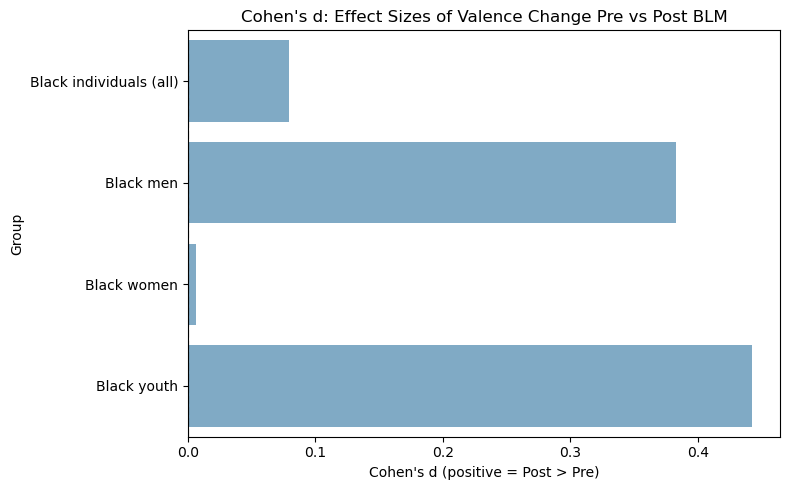

In [75]:
# Bar graph for cohen's d effect 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("BLM_FINAL_analysis_data.csv")

# Ensure datetime format
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Define BLM event date
blm_event_date = pd.Timestamp("2020-05-25")
df['period'] = np.where(df['published_at'] < blm_event_date, "Pre", "Post")

# Function for Cohen's d
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx-1)*x.std(ddof=1)**2 + (ny-1)*y.std(ddof=1)**2) / (nx+ny-2))
    return (x.mean() - y.mean()) / pooled_std

# Target groups
target_groups = {
    "Black individuals (all)": df,
    "Black men": df[df['cleaned_group'] == "Black men"],
    "Black women": df[df['cleaned_group'] == "Black women"],
    "Black youth": df[df['cleaned_group'] == "Black youth"]
}

# Calculate Cohen's d for each
results = []
for label, subset in target_groups.items():
    pre = subset[subset['period'] == "Pre"]['valence'].dropna()
    post = subset[subset['period'] == "Post"]['valence'].dropna()
    if len(pre) > 1 and len(post) > 1:
        d = cohen_d(pre, post)
        results.append({"Group": label, "Cohen_d": d})
    else:
        results.append({"Group": label, "Cohen_d": np.nan})

results_df = pd.DataFrame(results).dropna()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    y="Group", x="Cohen_d",
    palette=["#74add1" if d > 0 else "#f46d43" for d in results_df["Cohen_d"]]
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Cohen's d: Effect Sizes of Valence Change Pre vs Post BLM")
plt.xlabel("Cohen's d (positive = Post > Pre)")
plt.ylabel("Group")
plt.tight_layout()
plt.show()


In [77]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Ensure datetime
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Event date
event_date = pd.Timestamp("2020-05-25")

# Create time period column (Pre / Post)
df['time_period'] = np.where(df['published_at'] < event_date, 'Pre', 'Post')

# Contingency table: rows = time period, cols = dimensions
contingency_table = pd.crosstab(df['time_period'], df['cleaned_dimension'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Cramér's V calculation
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print results
print("=== Chi-square Test ===")
print(f"Chi2 statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")
print()
print("=== Cramér's V ===")
print(f"Cramér's V: {cramers_v:.3f}")
print(f"Effect size: {'small' if cramers_v < 0.1 else 'medium' if cramers_v < 0.3 else 'large'}")


=== Chi-square Test ===
Chi2 statistic: 172.667
Degrees of freedom: 4
P-value: 0.0000

=== Cramér's V ===
Cramér's V: 0.153
Effect size: medium


In [78]:
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Event date
event_date = pd.Timestamp("2020-05-25")

# Create time period column
df['time_period'] = np.where(df['published_at'] < event_date, 'Pre', 'Post')

# Groups to check
groups_to_check = {
    "Black men": df[df['cleaned_group'] == "Black men"],
    "Black women": df[df['cleaned_group'] == "Black women"],
    "Black youth": df[df['cleaned_group'] == "Black youth"],
    "All Black people": df  # whole dataset
}

# Store results
results = []

# Function to run Chi-square + Cramér's V
def run_chi_cramers(df_subset, group_name):
    contingency_table = pd.crosstab(df_subset['time_period'], df_subset['dimension'])
    
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        return None  # not enough data
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Cramér's V
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    results.append({
        "Group": group_name,
        "Chi2": chi2,
        "p_value": p,
        "Cramers_V": cramers_v,
        "Effect_Size": (
            "small" if cramers_v < 0.1 else
            "medium" if cramers_v < 0.3 else
            "large"
        )
    })

# Run for each group
for group_name, subset in groups_to_check.items():
    run_chi_cramers(subset, group_name)

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


              Group        Chi2       p_value  Cramers_V Effect_Size
0         Black men   26.500083  2.508397e-05   0.201914      medium
1       Black women    6.145687  1.885292e-01   0.078160       small
2       Black youth   11.027588  2.625571e-02   0.214803      medium
3  All Black people  172.904364  1.751198e-35   0.153023      medium
